In [1]:
import os

# use_gpu = False
# # compute_node = 1
# if use_gpu:
#     # os.environ["CUDA_VISIBLE_DEVICES"]= "%d" % (compute_node)
#     # print('Compute node: {}'.format(compute_node))
#     os.environ["CUDA_VISIBLE_DEVICES"]= "2,3"
# else: 
#     os.environ["CUDA_VISIBLE_DEVICES"]= "-1"


import numpy as np
import h5py
import scipy.io
from os.path import join 
import os.path
from PIL import Image

from adv_tools_PNAS.automap_config import src_weights, src_data;

from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import sys

from skimage.metrics import structural_similarity as ssim

import matplotlib
matplotlib.rcParams.update({'font.size': 14})


In [2]:
# GNOISE LEVELS

automap_gnoise_levels_rmse_vec = np.load(join(src_data,'NMARESP_automap_rmse_gnoise_levels.npy'))

automap_gnoise_outputs = np.load(join(src_data,'NMARESP_automap_output_gnoise_levels.npy'))

automap_gnoise_outputs = np.reshape(automap_gnoise_outputs,(automap_gnoise_outputs.shape[0],128,128))

lasso_gnoise_outputs = np.load(join(src_data,'NMARESP_lasso_gnoise_recons.npy'))

In [3]:
def rmse_comp(ref,inp):
    
    ref_norm = ref-ref.mean()
    
#     inp_mag = np.abs(inp_im)
    inp_norm = inp-inp.mean()
    inp_norm = inp_norm / (inp_norm.max()-inp_norm.min())

    rmse = np.sqrt(((inp_norm-ref_norm)**2).mean())
    
    return rmse

def ssim_comp(ref,inp):
    ref_norm = ref-ref.mean()
    
#     inp_mag = np.abs(inp_im)
    inp_norm = inp-inp.mean()
    inp_norm = inp_norm / (inp_norm.max()-inp_norm.min())

    ssim_out = ssim(ref_norm,inp_norm)

    return ssim_out

HCP_nbr = 1033
im_nbr = 2

data = scipy.io.loadmat(join(src_data, f'HCP_mgh_{HCP_nbr}_T2_subset_N_128.mat'));
mri_data = data['im'];

refimg = mri_data[2,:,:]

n_iter_vec = [50,100,250,500,1000]


automap_rmse_gnoise_levels = np.zeros(5)
lasso_rmse_gnoise_levels = np.zeros((5,len(n_iter_vec)))

automap_ssim_gnoise_levels = np.zeros(5)
lasso_ssim_gnoise_levels = np.zeros((5,len(n_iter_vec)))

for i in range(5):

    automap_recon = automap_gnoise_outputs[i,:,:]
    
    automap_rmse_gnoise_levels[i] = rmse_comp(refimg,automap_recon)
    automap_ssim_gnoise_levels[i] = ssim_comp(refimg,automap_recon)

    for n_iter_ind in range(len(n_iter_vec)):

            lasso_recon = lasso_gnoise_outputs[i,n_iter_ind,:,:]

            lasso_rmse_gnoise_levels[i,n_iter_ind] = rmse_comp(refimg,lasso_recon)
            lasso_ssim_gnoise_levels[i,n_iter_ind] = ssim_comp(refimg,lasso_recon)


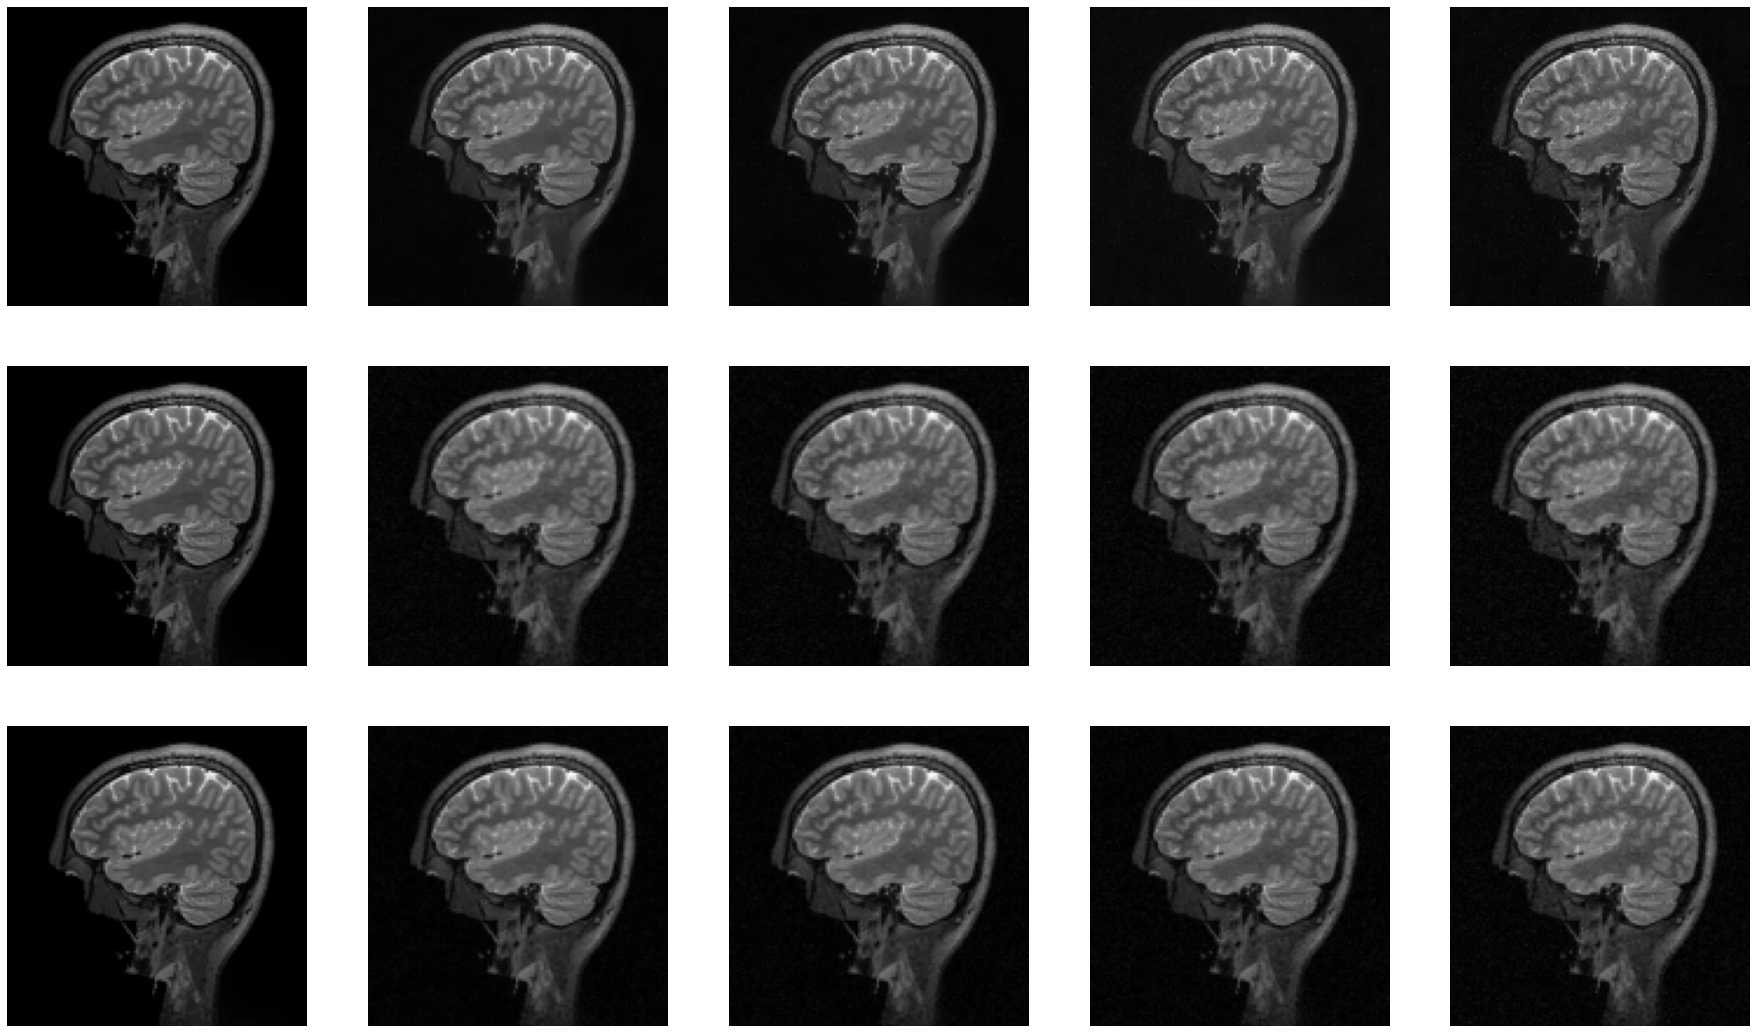

In [4]:

refimg = mri_data[2,:,:]
fig, axs = plt.subplots(3, 5,figsize=(25*1.25,15*1.25))

for i in range(5):



    automap_recon = automap_gnoise_outputs[i,:,:]


    # print(axs[1,i])
    if i == 0:
        axs[0,i].imshow(refimg,cmap='gray')
        axs[1,i].imshow(refimg,cmap='gray')
        axs[2,i].imshow(refimg,cmap='gray')
    else:
        axs[0,i].imshow(automap_recon,cmap='gray')


        lasso_recon = lasso_gnoise_outputs[i,1,:,:]
        axs[1,i].imshow(lasso_recon,cmap='gray')

        lasso_recon = lasso_gnoise_outputs[i,4,:,:]
        axs[2,i].imshow(lasso_recon,cmap='gray')


    axs[0,i].axis('off')
    axs[1,i].axis('off')
    axs[2,i].axis('off')

    

            

Text(0.5, 0, '$||r||_2 / ||x||_2$')

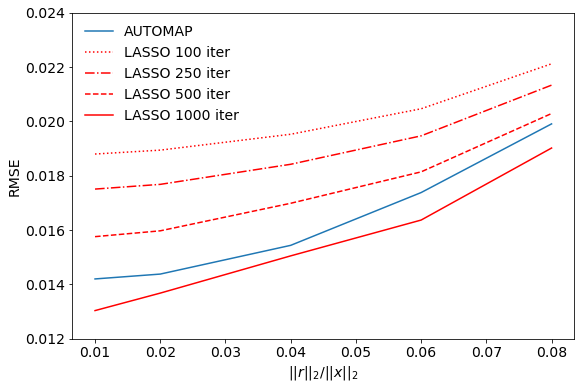

In [5]:
plt.figure(figsize=(9,6))
plt.plot([0.01,0.02,0.04,0.06,0.08],automap_rmse_gnoise_levels)
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_rmse_gnoise_levels[:,1],'r:')
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_rmse_gnoise_levels[:,2],'r-.')
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_rmse_gnoise_levels[:,3],'r--')
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_rmse_gnoise_levels[:,4],'r')
plt.legend(['AUTOMAP','LASSO 100 iter','LASSO 250 iter','LASSO 500 iter','LASSO 1000 iter'],loc='upper left', frameon=False)

plt.ylim([0.012,0.024])
plt.ylabel('RMSE')
plt.xlabel('$||r||_2 / ||x||_2$')

Text(0.5, 0, '$||r||_2 / ||x||_2$')

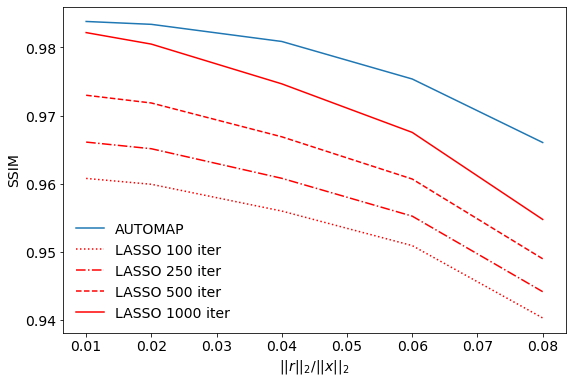

In [6]:
plt.figure(figsize=(9,6))
plt.plot([0.01,0.02,0.04,0.06,0.08],automap_ssim_gnoise_levels)
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_ssim_gnoise_levels[:,1],'r:')
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_ssim_gnoise_levels[:,2],'r-.')
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_ssim_gnoise_levels[:,3],'r--')
plt.plot([0.01,0.02,0.04,0.06,0.08],lasso_ssim_gnoise_levels[:,4],'r')

plt.legend(['AUTOMAP','LASSO 100 iter','LASSO 250 iter','LASSO 500 iter','LASSO 1000 iter'],loc='lower left', frameon=False)


plt.ylabel('SSIM')
plt.xlabel('$||r||_2 / ||x||_2$')